# 
En este notebook se analizarán datos que contienen información sobre el material particulado 2.5 (por su tamaño de 2.5 micras) o PM2.5 de la embajada de EE.UU en Beijin. Adicional, se incluye información de los datos meteorológicos del aeropuerto Internacional de ésta ciudad.

Miremos la información que aporta cada atributo del dataset:

| Variable | Definición	| Valores | 
|  :--- | :--- | :--- |
| No             | Número de fila  | Numéricos |
| Year      | Año de la toma de los datos | Numéricos  |
| Month     | Mes de la toma de los datos | Numéricos  |
| Day      | Día de la toma de los datos | Numéricos  |
| Hour      | Hora de la toma de los datos | Numéricos  |
| PM2.5        | Concentración de PM2.5 ($\mu g / m^3$)	| Numéricos |
| DEWP            |	Punto de rocío (ºF)	| Numéricos |
| TEMP           |	Temperatura (ºF)	| Numéricos |
| PRES |	Presión (hPa) | Numéricos |
| Cbwd         |	Dirección de viento combinada	| Cadenas de texto |
| Lws    |	Velocidad del viento acumulada (m/s) 	| Numéricos |
| Ls     |	Horas de nieve acumulada	| Numéricos |
| Lr     |	Horas de lluvia acumulada	| Numéricos |



In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
rc('text', usetex=False)
rc('font', family='serif')

In [113]:
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
data.head(2)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0


## 1. Diga qué índices serían pertienentes tener y pongalos.

Considero que sería pertinente tener como índice la fecha. Para ello, primero unificaremos todas las coñlumnas correspondientes al año, mes, día y hora, para posteriormente convertirla en el índice:

In [124]:

df = data[['year','month','day']]
data['fecha'] = pd.to_datetime(df) + pd.to_timedelta(data.hour, unit = 'h')

In [125]:
data= data.set_index("fecha")

In [126]:
data.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
fecha,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


## 2. Elimine registros que tengan NA en la columna "pm2.5"

Primero miremos cuántos registros nulos hay en el dataset:

In [127]:
nullcolumn = data['pm2.5'].isnull().sum()

In [128]:
print(f'Tenemos {nullcolumn} valores nulos en la columna pm2.5')

Tenemos 2067 valores nulos en la columna pm2.5


In [129]:
data = data.dropna()

In [130]:
data.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
fecha,,,,,,,,,,,,,
2010-01-02 00:00:00,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


## 3. Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

In [131]:
#miremos primero la cantidad de datos por year
data.year.value_counts()

2013    8678
2014    8661
2012    8295
2010    8091
2011    8032
Name: year, dtype: int64

In [132]:
data.groupby('year').describe().T

year             2010          2011          2012          2013          2014
No count  8091.000000   8032.000000   8295.000000   8678.000000   8661.000000
   mean   4354.141268  13201.776768  21860.769379  30677.221249  39429.862487
   std    2552.460188   2552.003366   2511.078629   2526.661534   2525.144611
   min      25.000000   8785.000000  17521.000000  26305.000000  35065.000000
   25%    2122.000000  10961.750000  19678.500000  28485.250000  37241.000000
...               ...           ...           ...           ...           ...
Ir min       0.000000      0.000000      0.000000      0.000000      0.000000
   25%       0.000000      0.000000      0.000000      0.000000      0.000000
   50%       0.000000      0.000000      0.000000      0.000000      0.000000
   75%       0.000000      0.000000      0.000000      0.000000      0.000000
   max      36.000000     23.000000     32.000000     25.000000     23.000000

[88 rows x 5 columns]

Se puede observar la tabla con la descripción general para cada uno de los atributos por año, pero al ser grande no se puede visualizar completa, así que procederemos a hace una tabla para cada una por separado:

In [134]:
data.groupby(data['year'])['pm2.5'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,104.045730,92.281185,1.0,35.0,79.0,147.0,980.0
2011,8032.0,99.071340,92.967298,2.0,27.0,71.0,139.0,595.0
2012,8295.0,90.545871,81.745087,0.0,25.0,69.0,132.0,994.0
2013,8678.0,101.712376,98.070477,2.0,32.0,71.5,138.0,886.0
2014,8661.0,97.734557,93.531528,2.0,28.0,72.0,133.0,671.0


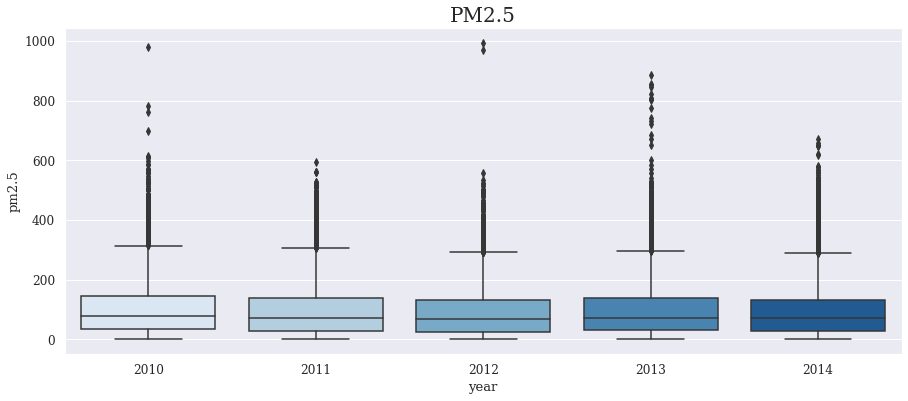

In [144]:
plt.figure(figsize=(15,6))
ax = sns.boxplot( x=data['year'], y=data['pm2.5'],palette = 'Blues');
ax.set_title('PM2.5',fontsize=20);
plt.setp(ax1.get_xticklabels(), visible=True,fontsize = 20);
plt.setp(ax1.get_yticklabels(), visible=True,fontsize = 20);

In [140]:
data.groupby(data['year'])['DEWP'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,1.352120,14.584996,-28.0,-11.0,1.0,15.0,28.0
2011,8032.0,2.033118,14.503209,-27.0,-10.0,2.0,16.0,28.0
2012,8295.0,1.953707,14.561339,-28.0,-11.0,3.0,15.0,27.0
2013,8678.0,1.342590,14.360272,-33.0,-11.0,0.0,15.0,26.0
2014,8661.0,2.073086,14.159683,-40.0,-9.0,4.0,15.0,25.0


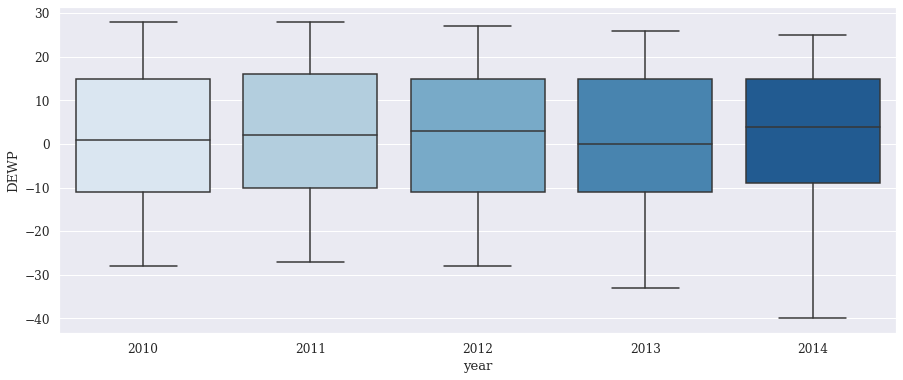

In [146]:
plt.figure(figsize=(15,6))
ax = sns.boxplot( x=data['year'], y=data['DEWP'],palette = 'Blues');

In [147]:
data.groupby(data['year'])['TEMP'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,11.313805,12.684701,-19.0,0.0,11.0,23.0,41.0
2011,8032.0,12.407869,12.095837,-15.0,2.0,14.0,23.0,36.0
2012,8295.0,12.109946,12.339970,-17.0,1.0,14.0,23.0,38.0
2013,8678.0,12.383614,12.033222,-17.0,2.0,13.0,23.0,38.0
2014,8661.0,13.709156,11.616259,-13.0,3.0,15.0,23.0,42.0


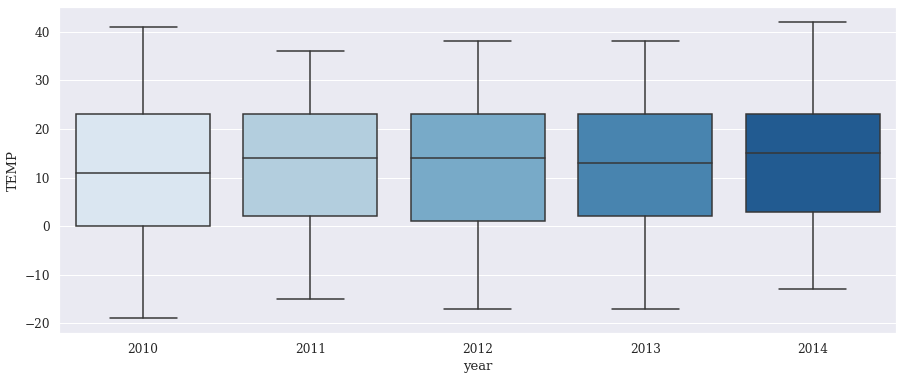

In [148]:
plt.figure(figsize=(15,6))
ax = sns.boxplot( x=data['year'], y=data['TEMP'],palette = 'Blues');

In [149]:
data.groupby(data['year'])['PRES'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,1016.291373,9.797649,994.0,1009.0,1015.0,1023.0,1043.0
2011,8032.0,1017.461653,11.296902,993.0,1007.0,1018.0,1027.0,1045.0
2012,8295.0,1016.080289,10.025194,992.0,1008.0,1016.0,1024.0,1041.0
2013,8678.0,1015.817066,10.506757,991.0,1007.0,1016.0,1024.0,1046.0
2014,8661.0,1016.614017,9.756248,993.0,1008.0,1016.0,1025.0,1039.0


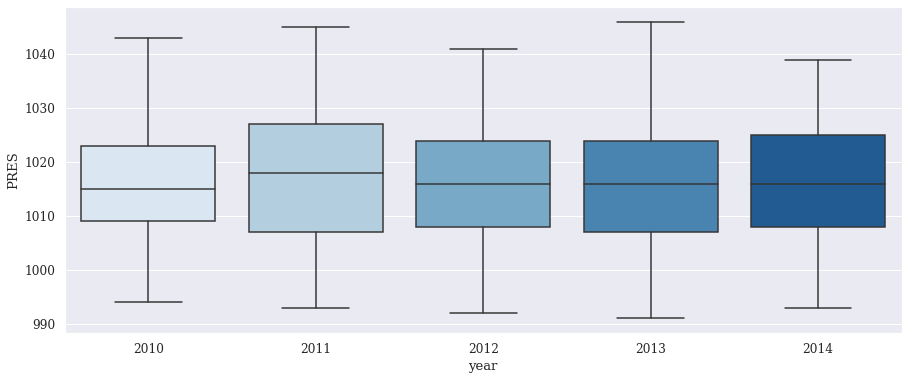

In [151]:
plt.figure(figsize=(15,6))
ax = sns.boxplot( x=data['year'], y=data['PRES'],palette = 'Blues');

In [152]:
data.groupby(data['year'])['cbwd'].describe()

,count,unique,top,freq
year,,,,
2010,8091,4,NW,2887
2011,8032,4,NW,2900
2012,8295,4,SE,2930
2013,8678,4,SE,3025
2014,8661,4,SE,3186


In [153]:
data.groupby(data['year'])['Iws'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,29.214860,56.150098,0.45,1.79,7.14,27.72,565.49
2011,8032.0,25.491912,49.820456,0.45,1.79,6.25,24.13,445.66
2012,8295.0,24.610321,49.794085,0.45,1.79,5.81,24.14,454.62
2013,8678.0,21.058177,47.598791,0.45,1.79,4.92,18.79,490.38
2014,8661.0,19.465400,43.837185,0.45,1.79,4.90,17.00,441.18


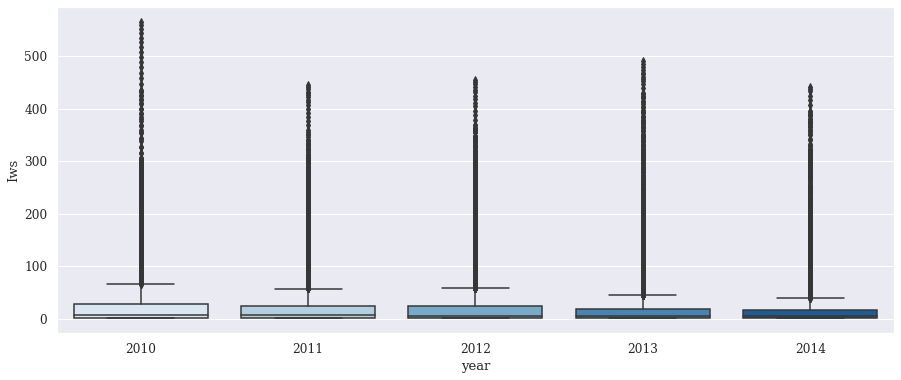

In [155]:
plt.figure(figsize=(15,6))
ax = sns.boxplot( x=data['year'], y=data['Iws'],palette = 'Blues');

In [156]:
data.groupby(data['year'])['Is'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,0.077123,1.019457,0.0,0.0,0.0,0.0,27.0
2011,8032.0,0.056399,0.748339,0.0,0.0,0.0,0.0,20.0
2012,8295.0,0.076070,0.866199,0.0,0.0,0.0,0.0,19.0
2013,8678.0,0.035262,0.460145,0.0,0.0,0.0,0.0,11.0
2014,8661.0,0.034292,0.708804,0.0,0.0,0.0,0.0,23.0


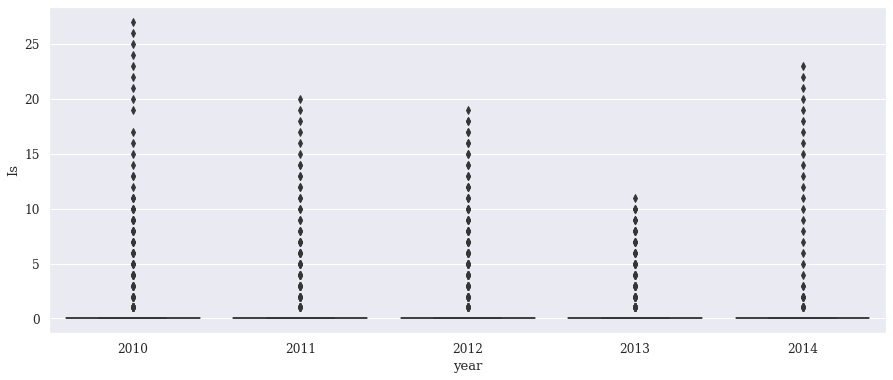

In [157]:
plt.figure(figsize=(15,6))
ax = sns.boxplot( x=data['year'], y=data['Is'],palette = 'Blues');

In [158]:
data.groupby(data['year'])['Ir'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,0.269312,1.836257,0.0,0.0,0.0,0.0,36.0
2011,8032.0,0.149278,1.110730,0.0,0.0,0.0,0.0,23.0
2012,8295.0,0.265943,1.766490,0.0,0.0,0.0,0.0,32.0
2013,8678.0,0.161904,1.150911,0.0,0.0,0.0,0.0,25.0
2014,8661.0,0.132548,1.034723,0.0,0.0,0.0,0.0,23.0


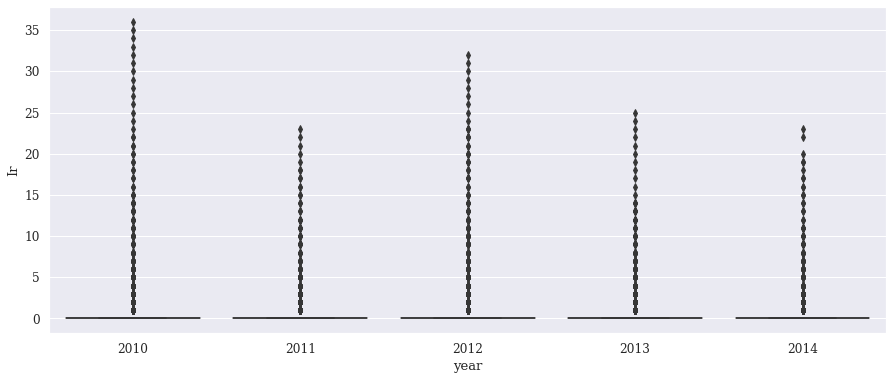

In [159]:
plt.figure(figsize=(15,6))
ax = sns.boxplot( x=data['year'], y=data['Ir'],palette = 'Blues');

## 4. Realice un gráfico de dispersión de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

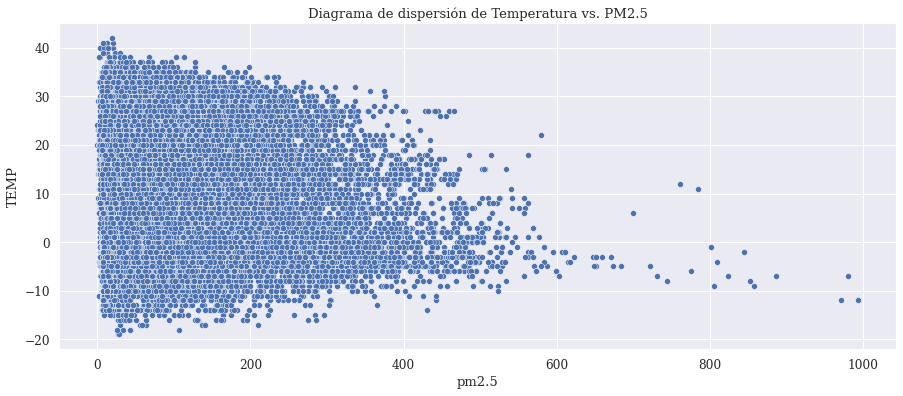

In [160]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x=data['pm2.5'], y=data['TEMP']);
ax.set_title('Diagrama de dispersión de Temperatura vs. PM2.5');

Del gráfico se puede decir que no hay una correlación lineal entre las dos variables, es decir, son independientes entre sí. Miremos cómo es la correlación entre las variables:

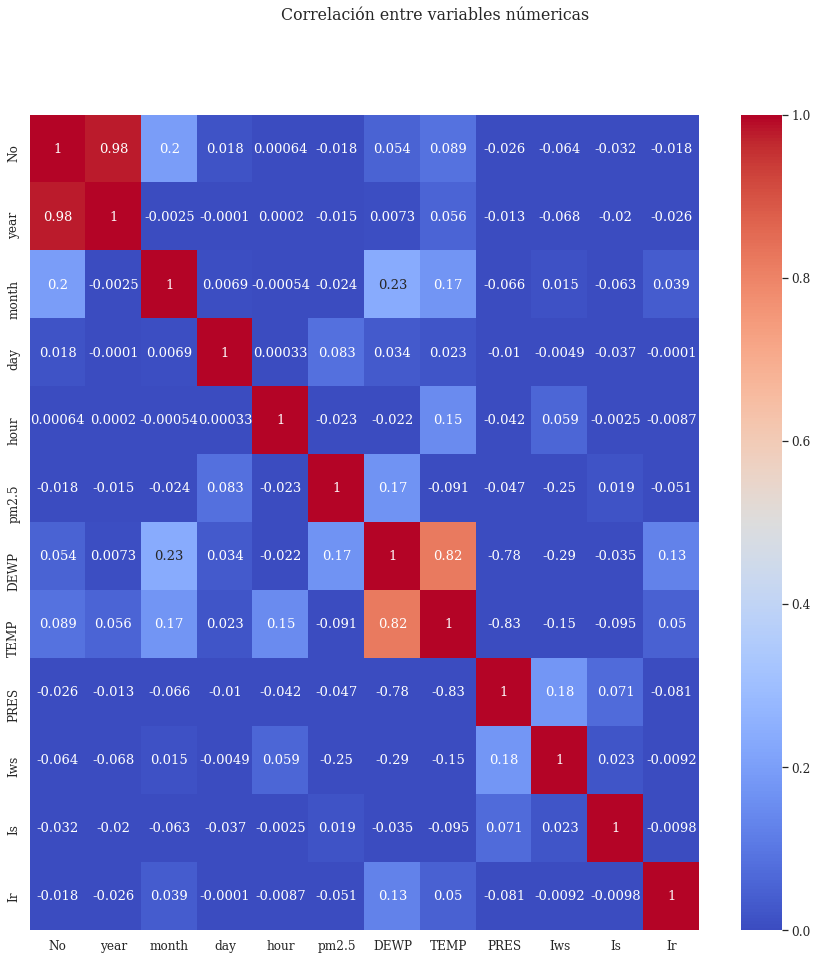

In [164]:
plt.figure(figsize=(15,15))
plt.suptitle('Correlación entre variables númericas');
sns.heatmap(data.corr(), annot=True, 
            cmap='coolwarm', vmin=0);

La correlación más alta que hay entre las variables es entre el Punto de Rocío y la Temperatura:

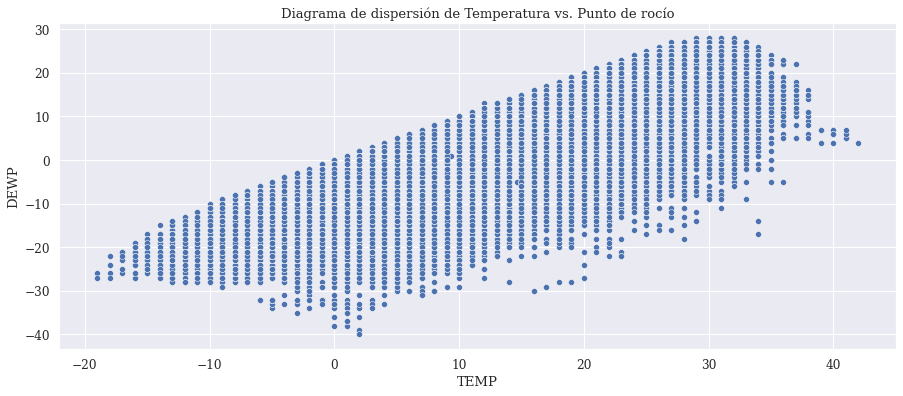

In [165]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x=data['TEMP'], y=data['DEWP']);
ax.set_title('Diagrama de dispersión de Temperatura vs. Punto de rocío');

## 5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120

La probabilidad está dada por:

$$
P(evento) = \frac{Número\_elementos\_evento}{Espacio\_muestral}
$$

El número de elementos del evento en que pm2.5 es mayor a 120 es:

In [167]:
pm_mayor = len(data[data['pm2.5'] > 120])
pm_mayor

12483

El espacio muestral es:

In [169]:
esp_mues = len(data)
esp_mues

41757

In [170]:
print(f'La probabilidad es: {pm_mayor/esp_mues * 100:0.1f}%')

La probabilidad es: 29.9%


## 6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.

In [172]:
data_prom = pd.DataFrame(data.groupby(data['year'])['pm2.5'].mean()).sort_values(by='pm2.5', ascending=True)
data_prom

,pm2.5
year,
2012,90.545871
2014,97.734557
2011,99.071340
2013,101.712376
2010,104.045730
